<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_000_basic/_006_multi_camp_tf_2_0/_012_tf_2_VGG16_backbone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
cifar10 = keras.datasets.cifar10

(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [3]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))

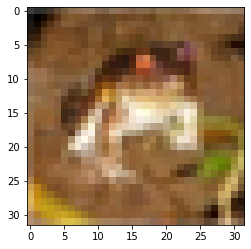

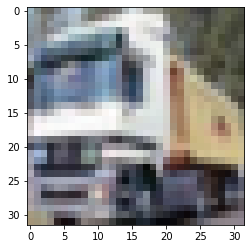

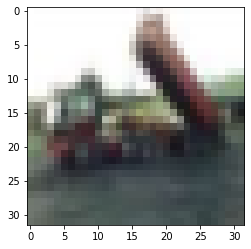

In [4]:
import matplotlib.pyplot as plt
for image, label in train_dataset.take(3):
  plt.figure()
  plt.imshow(image)

In [8]:
IMG_SIZE = 180
def change_format(image, label):
  image = tf.cast(image, tf.float32)
  image = image / 255.
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label


In [9]:
train_dataset = train_dataset.map(change_format)
test_dataset = test_dataset.map(change_format)

In [10]:
train_dataset.element_spec

(TensorSpec(shape=(180, 180, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(1,), dtype=tf.uint8, name=None))

In [11]:
backbone = keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(180, 180, 3))
# backbone network는 학습시키지 않음.
backbone.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [13]:
model = keras.Sequential()
model.add(backbone)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(4096, activation='relu'))
model.add(keras.layers.Dense(4096, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 4096)              52432896  
_________________________________________________________________
dense_4 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_5 (Dense)              (None, 10)                40970     
Total params: 83,969,866
Trainable params: 69,255,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [15]:
train_dataset = train_dataset.shuffle(1000).batch(64)
test_dataset = test_dataset.batch(64)

In [18]:
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])


In [ ]:
model.fit(train_dataset, epochs=10)

Epoch 1/10
  5/782 [..............................] - ETA: 3:09:12 - loss: 13.7732 - accuracy: 0.0969